In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits

In [2]:
exp1 = fits.open('/Users/sidneylower/Documents/ObsTech CCD/linear1_1.FIT')[0].data
exp5 = fits.open('/Users/sidneylower/Documents/ObsTech CCD/linear5_1.FIT')[0].data
exp10 = fits.open('/Users/sidneylower/Documents/ObsTech CCD/linear10_1.FIT')[0].data
exp30 = fits.open('/Users/sidneylower/Documents/ObsTech CCD/linear30_3.FIT')[0].data
exp60 = fits.open('/Users/sidneylower/Documents/ObsTech CCD/linear60_2.FIT')[0].data
exp100 = fits.open('/Users/sidneylower/Documents/ObsTech CCD/linear100_1.FIT')[0].data
exp300 = fits.open('/Users/sidneylower/Documents/ObsTech CCD/linear300_2.FIT')[0].data

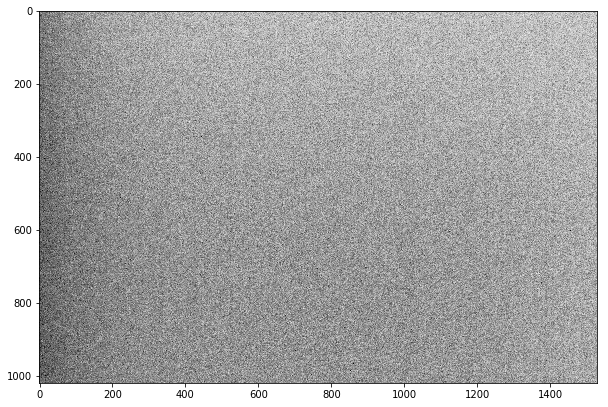

In [3]:
#here i cycle through (manually) each exposure to select a region of (as close as possible) uniform illumination
plt.figure(figsize=(10,10))
norm = matplotlib.colors.Normalize(vmin = 1000., vmax=1150.)
plt.imshow(exp1,norm=norm,cmap='Greys') 

In [4]:
exp1.shape

(1020, 1530)

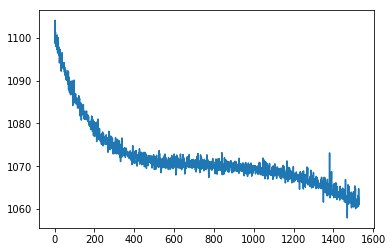

In [5]:
plt.plot(np.mean(exp1, axis=0)) #y axis

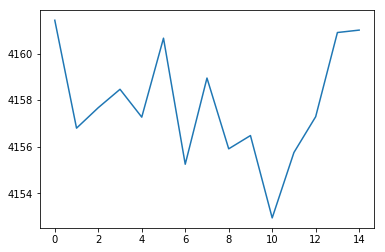

In [6]:
plt.plot(np.mean(exp30, axis=0)[5:20]) #selection for y

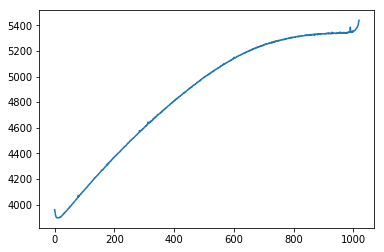

In [7]:
plt.plot(np.mean(exp30, axis=1)) 

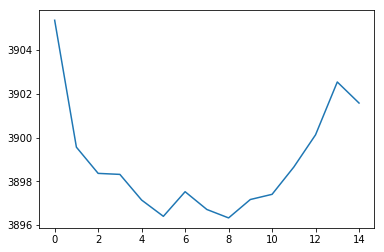

In [8]:
plt.plot(np.mean(exp30, axis=1)[5:20]) #selection for x

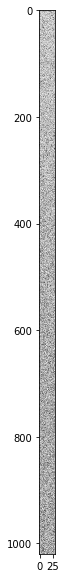

In [9]:
plt.figure(figsize=(10,10))
norm = matplotlib.colors.Normalize(vmin = 1000., vmax=1150.)

plt.imshow(exp1[:,1500:],norm=norm,cmap='Greys') #refined selection

In [10]:
exp300_selection_br = exp300[800:1100, 800:1000]
exp100_selection_br = exp100[800:1000, 800:1000]
exp60_selection_br = exp60[800:1000, 800:1000]
exp30_selection_br = exp30[800:1000, 800:1000]
exp10_selection_br = exp10[800:1000, 800:1000]
exp5_selection_br = exp5[800:1000, 800:1000]
exp1_selection_br = exp1[800:1000, 0:50]

exp300_selection_dim = exp300[5:20, 5:20]
exp100_selection_dim = exp100[5:20, 5:20]
exp60_selection_dim = exp60[5:20, 5:20]
exp30_selection_dim = exp30[5:20, 5:20]
exp10_selection_dim = exp10[5:20, 5:20]
exp5_selection_dim = exp5[5:20, 5:20]
exp1_selection_dim = exp1[5:90,1500:1600]

exp_time = [300, 100, 60, 30, 10, 5, 1]
exp_time = exp_time[::-1]
br_exp_list = [exp300_selection_br, exp100_selection_br, exp60_selection_br, exp30_selection_br, exp10_selection_br,
              exp5_selection_br, exp1_selection_br]
br_exp_list = br_exp_list[::-1]
                            
dim_exp_list = [exp300_selection_dim, exp100_selection_dim, exp60_selection_dim, exp30_selection_dim, exp10_selection_dim,
              exp5_selection_dim, exp1_selection_dim]
dim_exp_list = dim_exp_list[::-1]

#then make mean and rms lists
exp_means_br = [None] * len(exp_time)
exp_rms_br = [None] * len(exp_time)
                            
exp_means_dim = [None] * len(exp_time)
exp_rms_dim = [None] * len(exp_time)
for i in range(0, len(exp_time)):
    exp_means_br[i] = np.mean(br_exp_list[i])
    exp_rms_br[i] = np.std(br_exp_list[i])
    exp_means_dim[i] = np.median(dim_exp_list[i])
    exp_rms_dim[i] = np.std(dim_exp_list[i])
    

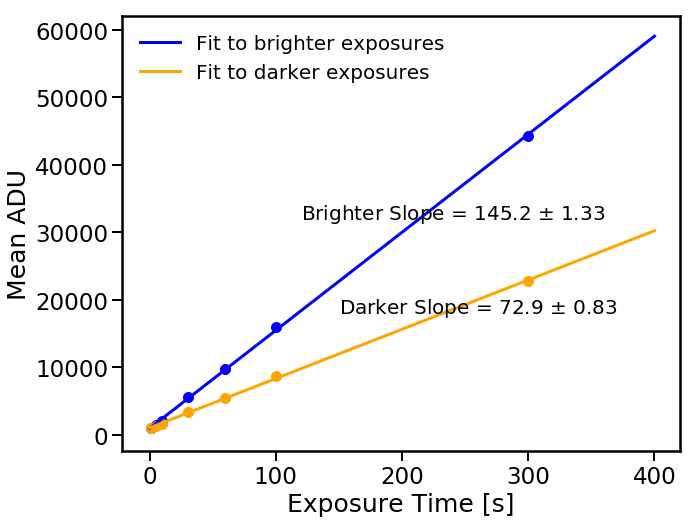

In [18]:
#plot mean values and fit curve to see if slope is linear
from scipy.optimize import curve_fit
plt.figure(figsize=(10,8))

plt.rcParams['xtick.labelsize'] = 23
plt.rcParams['ytick.labelsize'] = 23
plt.rcParams['axes.linewidth'] = 2.5
plt.tick_params('both', length=10, width=2, which='major')
plt.tick_params('both', length=4.5, width=2, which='minor')

plt.scatter(exp_time, exp_means_br, color='blue', s=100)
plt.scatter(exp_time, exp_means_dim, color='orange', s=100)

def linear(x, m, b):
    return m*x + b
popt_br, pcov_br = curve_fit(linear, exp_time, exp_means_br, p0=[1.0, 100.])
popt_dim, pcov_dim = curve_fit(linear, exp_time, exp_means_dim, p0=[1.0, 100.])

x = np.linspace(0, 400, 201)
plt.plot(x, linear(x, *popt_br), color='blue', lw=3, label='Fit to brighter exposures')
plt.plot(x, linear(x, *popt_dim), color='orange', lw=3, label='Fit to darker exposures')

plt.xlabel('Exposure Time [s]', fontsize=25)
plt.ylabel('Mean ADU', fontsize=25)

plt.annotate('Brighter Slope = 145.2 $\pm$ 1.33', xy=(120, 32000), fontsize=20)
plt.annotate('Darker Slope = 72.9 $\pm$ 0.83', xy=(150, 18000), fontsize=20)

plt.legend(loc='upper left', frameon=False, fontsize=20)

In [15]:
popt_dim[0], np.sqrt(np.diag(pcov_dim))[0]

(72.95594168960116, 0.8267951706031716)

In [23]:
#look @ residuals
#data - fit / fit


dat_x = exp_time
br_fit_y = linear(np.float64(dat_x), *popt_br)
dim_fit_y = linear(np.float64(dat_x), *popt_dim)

br_dat_y = exp_means_br
dim_dat_y = exp_means_dim



In [38]:
resid_br = (br_dat_y - br_fit_y) / br_fit_y
resid_dim = (dim_dat_y - dim_fit_y) / dim_fit_y

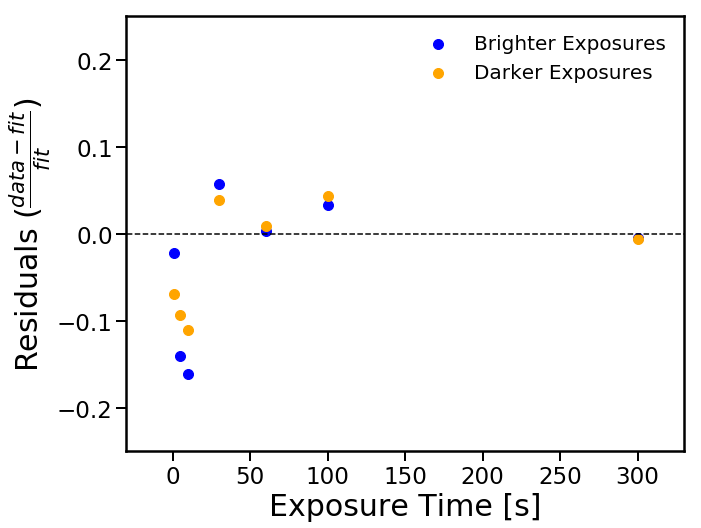

In [41]:
plt.figure(figsize=(10,8))

plt.rcParams['xtick.labelsize'] = 23
plt.rcParams['ytick.labelsize'] = 23
plt.rcParams['axes.linewidth'] = 2.5
plt.tick_params('both', length=10, width=2, which='major')
plt.tick_params('both', length=4.5, width=2, which='minor')

plt.scatter(dat_x, resid_br, color='blue', s=100, label='Brighter Exposures')
plt.scatter(dat_x, resid_dim, color='orange', s=100, label='Darker Exposures')
plt.plot([-50, 350], [0, 0], color='k', ls='--' )

plt.xlabel('Exposure Time [s]', fontsize=30)
plt.ylabel(r'Residuals ($\frac{data - fit}{fit}$)', fontsize=30)

plt.ylim([-.25, .25])
plt.xlim([-30, 330])

#plt.annotate('Brighter Slope = 145.2 $\pm$ 1.33', xy=(120, 32000), fontsize=20)
#plt.annotate('Darker Slope = 72.9 $\pm$ 0.83', xy=(150, 18000), fontsize=20)

plt.legend(loc='upper right', frameon=False, fontsize=20)